# Non-hierarchical Clustering
## K-Means
#### 최민영

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc


In [2]:
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [4]:
data = pd.read_csv("C:/Users/Hallym/Downloads/hierarchical clustering-20221014/pc_data.csv", index_col=0)
data

나이  PC경력  사용 시간
O1   20     6     14
O2   28     8     13
O3   42    14      6
O4   35    11      8
O5   30    15      7
O6   30     7     15
O7   45    13      6
O8   46     5      4
O9   51     3      3
O10  41     3      2

### 데이터 스케일링

In [5]:
from sklearn.preprocessing import StandardScaler

# X = StandardScaler().fit_transform(data)
# X

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
X

나이      PC경력     사용 시간
0 -1.818369 -0.588439  1.401868
1 -0.952479 -0.117688  1.175761
2  0.562829  1.294566 -0.406994
3 -0.194825  0.588439  0.045222
4 -0.736007  1.529941 -0.180886
5 -0.736007 -0.353063  1.627976
6  0.887537  1.059190 -0.406994
7  0.995774 -0.823815 -0.859210
8  1.536955 -1.294566 -1.085318
9  0.454592 -1.294566 -1.311425

## KMeans Algorithm 구현

In [6]:
# K = n_clusters
## the number of clsuters

import os
from scipy.spatial.distance import euclidean

def kmeans(X, features, K, return_centroids = False, verbose =0, random_state = 999 ):   
    ## [Step 0] 초기 객체 선정
    Centroids = X.sample(n = K, random_state=random_state)
    
    ## 필요한 파라미터 초기화
    _X = X.copy()
    tol = 1 # 초기값 1 설정
    itt = 1
    
    ##업데이트 과정
    while tol > 1e-5:
        for j, rows_c in enumerate(Centroids.values):
            dist_Cj = [euclidean(rows_x, rows_c)**2 for i, rows_x in enumerate(X.values) ]
            _X[j+1] = dist_Cj 

        _X['clusters'] = np.apply_along_axis(np.argmin, axis = 1, arr= _X[range(1,K+1)])+1
        Centroids_new = _X.groupby('clusters').mean()[features]
        tol = np.abs(Centroids.values - Centroids_new.values).sum()
        if verbose > 0:
            print(f"tol is {tol}")
            print(f"{Centroids} \n====>\n {Centroids_new}")
        Centroids = Centroids_new
        itt += 1
    ## within sum of square
    WSS = _X.groupby('clusters').sum().drop(features, axis = 1).to_numpy().trace()
    #WSS = _X.drop(features, axis=1).groupby('clusters').sum().values.trace()
    if return_centroids:
        return _X, WSS, Centroids
    else:
        return _X, WSS

In [7]:
K=3
_X = X.copy()
X.sample(n = K, random_state=222) 

Centroids = X.sample(n = K, random_state=None)
#print(Centroids)
itt=1
tol = 1

while tol > 1e-5: 
    for j, rows_c in enumerate(Centroids.values):
        #print(row_c)
        dist_list=[]
        for i, rows_x in enumerate(X.values):
            #print(euclidean(rows_x,rows_c)**2)
            dist_list.append(euclidean(rows_x,rows_c)**2)
        #print(f"{j}th cluster: distance_list")
        #print(dist_list)
        _X[j+1] = dist_list
    _X['cluster'] = np.apply_along_axis(func1d = np.argmin,axis = 1 ,arr = _X[range(1,K+1)])+1
    Centroids_new = _X.groupby('cluster').mean()[X.columns]
    tol = np.abs(Centroids.values - Centroids_new.values).sum()
    WSS =_X.drop(X.columns, axis = 1).groupby('cluster').sum().values.trace()
    Centroids = Centroids_new
    print(f"[iteration{itt}] tol: {tol} wss:{WSS}")
    itt += 1

print(_X)

[iteration1] tol: 4.052602697154926 wss:32.8385504444889
[iteration2] tol: 0.9057214867841634 wss:8.722258451626207
[iteration3] tol: 1.296247349503223 wss:7.54052458547967
[iteration4] tol: 1.1970484335265388 wss:4.843116697363548
[iteration5] tol: 0.0 wss:3.9468793815032917
         나이      PC경력     사용 시간         1          2          3  cluster
0 -1.818369 -0.588439  1.401868  9.394983   0.477145  14.407126        2
1 -0.952479 -0.117688  1.175761  4.695578   0.153387   9.948483        2
2  0.562829  1.294566 -0.406994  0.247363   8.985728   6.563230        1
3 -0.194825  0.588439  0.045222  0.465789   3.675840   5.675023        1
4 -0.736007  1.529941 -0.180886  0.922629   6.238260  10.933094        1
5 -0.736007 -0.353063  1.627976  6.393571   0.238566  10.976600        2
6  0.887537  1.059190 -0.406994  0.606260   9.495591   5.297938        1
7  0.995774 -0.823815 -0.859210  4.907172  10.020117   0.149617        3
8  1.536955 -1.294566 -1.085318  8.519429  14.394451   0.317500   

In [8]:
_X, wss = kmeans(X=X, features= X.columns, K=2, verbose=0)
_X

나이      PC경력     사용 시간          1          2  clusters
0 -1.818369 -0.588439  1.401868  13.139130   2.963008         2
1 -0.952479 -0.117688  1.175761   8.286953   0.673656         2
2  0.562829  1.294566 -0.406994   3.969269   3.310179         2
3 -0.194825  0.588439  0.045222   3.662307   0.561390         2
4 -0.736007  1.529941 -0.180886   7.933614   1.928658         2
5 -0.736007 -0.353063  1.627976   9.431951   1.598967         2
6  0.887537  1.059190 -0.406994   2.980090   3.831182         1
7  0.995774 -0.823815 -0.859210   0.059329   6.333733         1
8  1.536955 -1.294566 -1.085318   0.850270  10.485719         1
9  0.454592 -1.294566 -1.311425   0.919506   7.750138         1

## ```sklearn```'s KMeans

In [9]:
from sklearn.cluster import KMeans
N = X.shape[0]

K = 3
print('K using Rule of Thumb: {}'.format(K))

## model define & clustering 
km = KMeans(n_clusters = K,init = "k-means++",n_init = 5,tol = 1e-5,verbose = 1)

clsts = km.fit_predict(X)
clsts

K using Rule of Thumb: 3


C:\Users\Hallym\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Initialization complete
Iteration 0, inertia 8.801941991440135.
Iteration 1, inertia 3.9468793815032917.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6.502364575338683.
Iteration 1, inertia 3.9468793815032917.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 7.784578770687446.
Iteration 1, inertia 3.9468793815032917.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 7.473638889538808.
Iteration 1, inertia 3.9468793815032917.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 8.252202288615102.
Iteration 1, inertia 3.9468793815032917.
Converged at iteration 1: strict convergence.


array([0, 0, 2, 2, 2, 0, 2, 1, 1, 1])

In [10]:
km.inertia_ #wss
km.cluster_centers_ # centroids
km.labels_
km.max_iter 

300

### +) dictionary로 파라미터를 지정하는 방법

In [11]:
kmeans_params = {
    "n_clusters" : K,
    "init" : "k-means++",
    "n_init" : 5,
    "tol" : 1e-5,
    "max_iter":1000,
    "verbose" : 1
}
KMeans(**kmeans_params)

KMeans(max_iter=1000, n_clusters=3, n_init=5, tol=1e-05, verbose=1)

In [12]:
km.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 5,
 'random_state': None,
 'tol': 1e-05,
 'verbose': 1}

In [13]:
## 시각화 모듈 import
from plot_cluster import * 


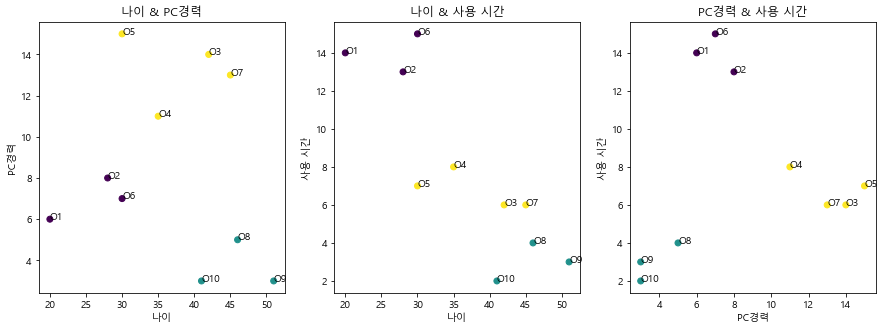

In [14]:
plt.figure(figsize = (15,5))
plot_pair_scatter(data, c = clsts)

### ```ours: kmeans```, ```sklearn: KMeans``` 비교
- ```random_seed```를 설정함으로써 동일한 결과를 얻을 수 있다.

In [15]:
## ours: kmeans
wss_list = []
K_list = np.arange(2,8)
for k in K_list:
    _X, wss = kmeans(X, X.columns, K = k, verbose=0, random_state=1)
    wss_list.append(wss)

In [16]:
wss_list, K_list

([15.155470160522045,
  3.946879381503291,
  2.400472517948324,
  2.3200537862673483,
  1.704839504746859,
  0.9891222037995269],
 array([2, 3, 4, 5, 6, 7]))

In [17]:
## sklearn: KMeans
wss_list2 = []
for k in K_list:
    km2 = KMeans(n_clusters=k, init = "random", max_iter=3, random_state = 1)
    km2.fit(X)
    wss_list2.append(km2.inertia_) #wss

C:\Users\Hallym\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hallym\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hallym\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Hallym\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_

In [18]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plot_elbow(K_list, wss_list, title = "ours: kmeans result")

plt.subplot(122)
plot_elbow(K_list, wss_list2, title = "sklearn: KMeans result")

#### wss 결과 비교

In [19]:
pd.DataFrame([wss_list, wss_list2], index = ['ours_kmeans', 'sklearn_Kmeans']).T

ours_kmeans  sklearn_Kmeans
0    15.155470       15.048254
1     3.946879        4.843117
2     2.400473        2.400473
3     2.320054        1.684755
4     1.704840        1.131818
5     0.989122        0.516604

#### 클러스터링 결과 비교

In [20]:
## ours
_X, wss = kmeans(X,features=X.columns, K=3)
print(_X.clusters.to_numpy())

## sklearn
print(km.labels_+1)

[2 2 1 1 1 2 1 3 3 3]
[1 1 3 3 3 1 3 2 2 2]


## 군집 평가 및 K 결정
```sklearn:KMeans``` 이용

In [21]:
from sklearn.metrics.cluster import rand_score,\
homogeneity_score,\
calinski_harabasz_score,\
silhouette_score, fowlkes_mallows_score

In [22]:
def print_cluster_evals(data, cluster_labels, true_labels = None):
## 내부 평가 지수
    print("[Internal]")
    print(f"Silhouette score: {silhouette_score(data, cluster_labels)}")
    print(f"CH score: {calinski_harabasz_score(data, cluster_labels)}")

    ## 외부 평가 지수
    if true_labels is not None:
        print('\n\n')
        print("[External]")
        print(f"Rand indedata: {rand_score(true_labels, cluster_labels)}")
        print(f"Fowlkes-Mellows indedata: {fowlkes_mallows_score(true_labels, cluster_labels)}")

In [23]:
print_cluster_evals(X, cluster_labels = _X.clusters) 

[Internal]
Silhouette score: 0.5979795070332969
CH score: 23.103295882836807


In [24]:
kmeans_params2 = kmeans_params.copy()

print(kmeans_params2)
silhouette_list = []
for k in K_list:
    kmeans_params2['n_clusters'] = k
    kmeans_clst= KMeans(**kmeans_params2 )
    silhouette_list.append(silhouette_score(X, kmeans_clst.fit_predict(X)))

{'n_clusters': 3, 'init': 'k-means++', 'n_init': 5, 'tol': 1e-05, 'max_iter': 1000, 'verbose': 1}
Initialization complete
Iteration 0, inertia 17.94342949553364.
Iteration 1, inertia 15.155470160522043.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 23.28806774610837.


C:\Users\Hallym\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Iteration 1, inertia 15.84505382104184.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 25.0861812303389.
Iteration 1, inertia 15.187127578109976.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 18.20805054701527.
Iteration 1, inertia 15.048253799313887.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 24.620656857488015.
Iteration 1, inertia 15.657564553906267.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 9.203428801742662.
Iteration 1, inertia 3.9468793815032917.
Converged at iteration 1: strict convergence.
Initialization complete


C:\Users\Hallym\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Iteration 0, inertia 9.203428801742662.
Iteration 1, inertia 3.9468793815032917.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 7.784578770687446.
Iteration 1, inertia 3.9468793815032917.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6.816613860137505.
Iteration 1, inertia 3.9468793815032917.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6.719045947369052.
Iteration 1, inertia 3.9468793815032917.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5.633414926507186.
Iteration 1, inertia 2.4004725179483244.
Converged at iteration 1: strict convergence.
Initialization complete


C:\Users\Hallym\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Iteration 0, inertia 4.976389897105881.
Iteration 1, inertia 2.4004725179483244.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4.764304598277001.
Iteration 1, inertia 2.4004725179483244.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 5.480040693378351.
Iteration 1, inertia 2.4004725179483244.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4.508766379178226.
Iteration 1, inertia 2.4004725179483244.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3.63964352151203.
Iteration 1, inertia 1.6847552170009923.
Converged at iteration 1: strict convergence.
Initialization complete


C:\Users\Hallym\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Iteration 0, inertia 3.0302252389635536.
Iteration 1, inertia 1.7852582364278349.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 4.257407045534406.
Iteration 1, inertia 1.847535121216958.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3.541670950433057.
Iteration 1, inertia 1.847535121216958.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 3.2783378161372476.
Iteration 1, inertia 1.7852582364278349.
Converged at iteration 1: strict convergence.
Initialization complete


C:\Users\Hallym\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Iteration 0, inertia 2.2636356405392513.
Iteration 1, inertia 1.1318178202696259.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2.255840725342217.
Iteration 1, inertia 1.0695409354805028.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 2.0557041682933033.
Iteration 1, inertia 1.2323208396964684.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1.7521899290697478.
Iteration 1, inertia 1.0695409354805028.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1.7521899290697478.
Iteration 1, inertia 1.0695409354805028.
Converged at iteration 1: strict convergence.
Initialization complete


C:\Users\Hallym\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Iteration 0, inertia 1.0332070774982727.
Iteration 1, inertia 0.5166035387491363.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1.186581310627107.
Iteration 1, inertia 0.5932906553135535.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1.0332070774982727.
Iteration 1, inertia 0.5166035387491363.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1.6980270220966105.
Iteration 1, inertia 0.8490135110483055.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 1.0332070774982727.
Iteration 1, inertia 0.5166035387491363.
Converged at iteration 1: strict convergence.


In [25]:
np.argmax(silhouette_list)

1

#### 실루엣 계수를 이용한 K 결정

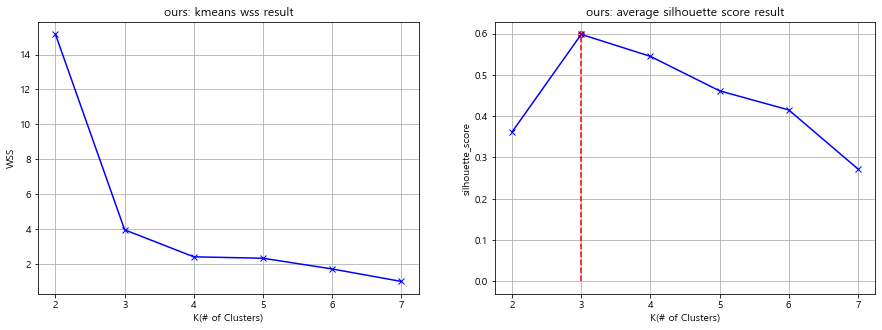

In [26]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plot_elbow(K_list, wss_list, title = "ours: kmeans wss result")

plt.subplot(122)
plot_elbow(K_list = K_list, wss_list = silhouette_list,
           ylabel= 'silhouette_score',
           title="ours: average silhouette score result")
optimal_cluster_idx = np.argmax(silhouette_list)
plt.scatter( K_list[optimal_cluster_idx], silhouette_list[optimal_cluster_idx], c = 'red')
plt.vlines(x = K_list[optimal_cluster_idx], ymin = 0, ymax=silhouette_list[optimal_cluster_idx], linestyles="--", colors = 'red')

### 결정된 K 적용

C:\Users\Hallym\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Initialization complete
Iteration 0, inertia 8.34734529097048.
Iteration 1, inertia 3.9468793815032917.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 8.909227318016406.
Iteration 1, inertia 3.9468793815032917.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 8.75585308488757.
Iteration 1, inertia 3.9468793815032917.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6.100877765036155.
Iteration 1, inertia 3.9468793815032917.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6.348990342209849.
Iteration 1, inertia 3.9468793815032917.
Converged at iteration 1: strict convergence.


Text(0, 0.5, 'PC경력')

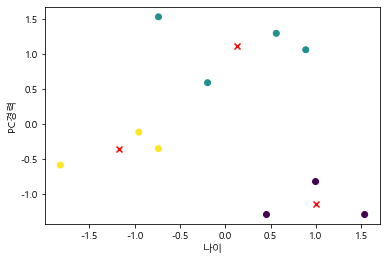

In [27]:
## 모델 정의
kmeans_params2['n_clusters'] = 3
kmeans_clst_opt = KMeans(**kmeans_params2)
kmeans_clst_opt.get_params()
## 모델 적합 및 군집화 수행
clsts = kmeans_clst_opt.fit_predict(X)
## 중심점(centroid)가져오기
cent = pd.DataFrame(kmeans_clst_opt.cluster_centers_)

## 중심 시각화
plt.scatter(cent.iloc[:,0], cent.iloc[:,1], c='red', marker="x")
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=clsts)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
# print_cluster_evals(X, result.clusters)

#### +) ```sklearn```: 클러스터별 실루엣 계수 최적화


In [28]:
silhouette_score(X,clsts)

0.5979795070332969

In [29]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm
from matplotlib import colors

In [30]:
K = 3
avg_sil = silhouette_score(X,clsts)
sil_values = silhouette_samples(X, clsts)

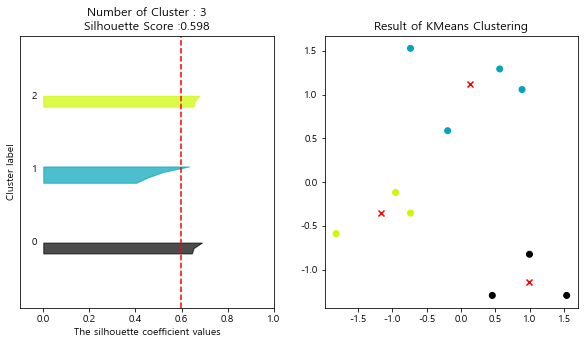

In [31]:
fig, axs = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)
axs[0].set_title('Number of Cluster : '+ str(K)+'\n' \
                    'Silhouette Score :' + str(round(avg_sil,3)) )
axs[0].set_xlabel("The silhouette coefficient values")
axs[0].set_ylabel("Cluster label")
axs[0].set_xlim([-0.1, 1])
axs[0].set_ylim([0, len(X) + (K + 1) * 10])
axs[0].set_yticks([])  # Clear the yaxis labels / ticks
axs[0].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

y_lower = 10
_colors = []
for i in range(K):
    ith_cluster_sil_values = sil_values[clsts==i]
    ith_cluster_sil_values.sort()

    size_cluster_i = ith_cluster_sil_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / K)
    _colors.append(colors.rgb2hex(color))
    axs[0].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values,
                        facecolor=color, edgecolor=color, alpha=0.7)
    axs[0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

axs[0].axvline(x=avg_sil, color="red", linestyle="--")


## 클러스터링 결과 & 클러스터 중심(centroids) 시각화
axs[1].set_title('Result of KMeans Clustering')

axs[1].scatter(X.iloc[:,0], X.iloc[:,1], c = [_colors[c] for c in clsts] )
axs[1].scatter(cent.iloc[:,0], cent.iloc[:,1], c = "r", marker ="x")

plt.show()

C:\Users\Hallym\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Initialization complete
Iteration 0, inertia 5.845339545937379.
Iteration 1, inertia 3.9468793815032917.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6.974584166467826.
Iteration 1, inertia 3.9468793815032917.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6.7579027944374594.
Iteration 1, inertia 3.9468793815032917.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 6.719045947369052.
Iteration 1, inertia 3.9468793815032917.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 7.473638889538808.
Iteration 1, inertia 3.9468793815032917.
Converged at iteration 1: strict convergence.


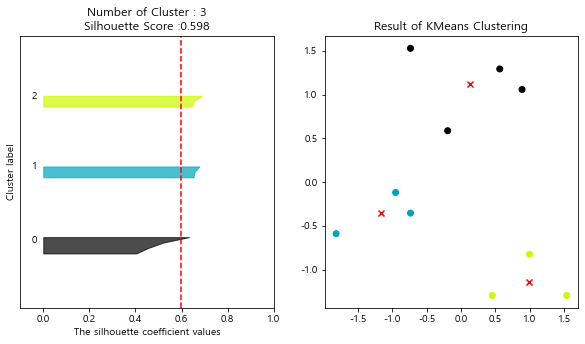

In [32]:
plot_silhouette_clusters(X, kmeans_clst_opt)